<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Voting-network" data-toc-modified-id="Voting-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Voting network</a></span></li><li><span><a href="#Email-network-1" data-toc-modified-id="Email-network-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Email network 1</a></span></li><li><span><a href="#Email-network-2" data-toc-modified-id="Email-network-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Email network 2</a></span></li><li><span><a href="#Email-network-3" data-toc-modified-id="Email-network-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Email network 3</a></span></li><li><span><a href="#Combined-network" data-toc-modified-id="Combined-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Combined network</a></span></li><li><span><a href="#Voting-network-metrics-visualization" data-toc-modified-id="Voting-network-metrics-visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Voting network metrics visualization</a></span><ul class="toc-item"><li><span><a href="#Degree-centrality" data-toc-modified-id="Degree-centrality-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Degree centrality</a></span></li><li><span><a href="#Closeness-centrality" data-toc-modified-id="Closeness-centrality-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Closeness centrality</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Betweenness centrality</a></span></li></ul></li><li><span><a href="#Email-network-metric-visualization" data-toc-modified-id="Email-network-metric-visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Email network metric visualization</a></span><ul class="toc-item"><li><span><a href="#Degree-centrality" data-toc-modified-id="Degree-centrality-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Degree centrality</a></span></li><li><span><a href="#Closeness-centrality" data-toc-modified-id="Closeness-centrality-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Closeness centrality</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Betweenness centrality</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

note: restrict emails by the number of recipients  
or weighted by 1/#recipients

calculate metrics for different stages for the two network

normalize the email network between 0 and 1, and combine two network by multiply the edge thickness, so that the important edges in both networks will be left. 

find edge metric

interactive graph

In [18]:
df_vote = pd.read_csv('CRA_MeetingMinutes_AdjacencyMatrix/Network_ActiveMember_AdjacencyMatrix_Phase_1.csv',index_col=0)
df_vote = df_vote.fillna(0)
df_vote

,Marks,N..Maddox,Dailey,Desloge,Miller,Mustian,Sauls,Ziffer,Gillum,S..Maddox,Lindley,Dozier,Proctor,Richardson
Marks,1.000000,0.640625,0.529412,0.294118,0.671875,0.600000,0.588235,0.698413,0.671875,0.458333,0.723404,0.717391,0.595745,0.0
N..Maddox,0.640625,1.000000,0.882353,0.647059,0.906250,0.800000,0.941176,0.888889,0.921875,0.604167,0.957447,0.913043,0.425532,0.0
Dailey,0.529412,0.882353,1.000000,0.529412,0.941176,0.800000,0.941176,0.823529,0.823529,1.000000,0.000000,0.000000,0.000000,0.0
Desloge,0.294118,0.647059,0.529412,1.000000,0.588235,0.600000,0.588235,0.529412,0.470588,0.500000,0.000000,0.000000,0.000000,0.0
Miller,0.671875,0.906250,0.941176,0.588235,1.000000,0.866667,1.000000,0.888889,0.890625,0.604167,0.936170,0.847826,0.404255,0.0
Mustian,0.600000,0.800000,0.800000,0.600000,0.866667,1.000000,0.866667,0.733333,0.733333,0.000000,0.000000,0.000000,0.000000,0.0
Sauls,0.588235,0.941176,0.941176,0.588235,1.000000,0.866667,1.000000,0.823529,0.882353,1.000000,0.000000,0.000000,0.000000,0.0
Ziffer,0.698413,0.888889,0.823529,0.529412,0.888889,0.733333,0.823529,1.000000,0.904762,0.617021,0.978261,0.934783,0.434783,0.0
Gillum,0.671875,0.921875,0.823529,0.470588,0.890625,0.733333,0.882353,0.904762,1.000000,0.645833,0.957447,0.956522,0.446809,0.0
S..Maddox,0.458333,0.604167,1.000000,0.500000,0.604167,0.000000,1.000000,0.617021,0.645833,1.000000,0.586957,0.666667,0.456522,0.0


In [19]:
names = list(df_vote.columns)
names[1] = 'N. Maddox'
names[-5] = 'Maddox'

labels = {}
for i in range(len(names)):
    labels[i] = names[i]
# labels

rev_labels = {}
for i in range(len(names)):
    rev_labels[names[i].lower()] = i
# rev_labels

In [20]:
df2 = pd.read_csv('CRA_Meeting_Minutes_Coded_2020421.csv',index_col=0)
df2 = df2.fillna(0)
date = df2['DATE']

In [21]:
date = pd.to_datetime(date)
idxt1 = date>datetime(2014,1,23)
idxt2 = date>datetime(2014,5,14)
idxt3 = date>datetime(2016,2,24)
idxv1 = np.array(idxt1==False)
idxv2 = np.array((idxt1==True) & (idxt2==False))
idxv3 = np.array((idxt2==True) & (idxt3==False))
idxv4 = np.array(idxt3==True)

idxvs = [idxv1, idxv2, idxv3, idxv4]
stage_labels = ['before 2014,1,23', '2014,1,23 - 2014,5,14', '2014,5,14 - 2016,2,24', 'after 2016,2,24']

# date

# Voting network

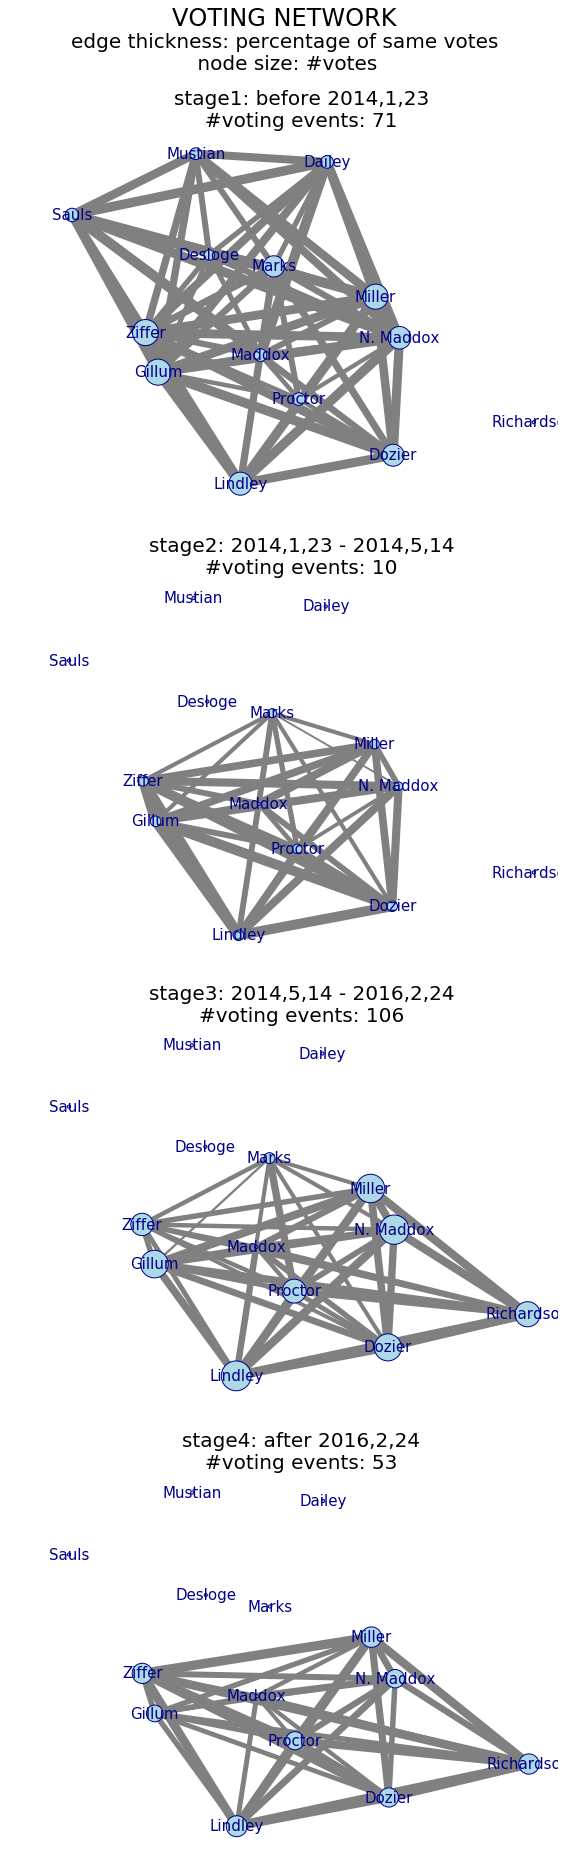

In [22]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('VOTING NETWORK',fontsize = 24, y=1.04)
fig.text(.5, 1.005, 'edge thickness: percentage of same votes\n node size: #votes', fontsize = 20, ha='center')

for i in range(4):
    df_vote = pd.read_csv('CRA_MeetingMinutes_AdjacencyMatrix/Network_ActiveMember_AdjacencyMatrix_Phase_'+str(i+1)+'.csv',index_col=0)
    df_vote = df_vote.fillna(0)
    adj_mat = df_vote.values
    
    plt.subplot(4,1,i+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)
    if i == 0:
        pos = nx.kamada_kawai_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 10*np.array(edge_width)

    df3 = df2.iloc[idxvs[i]] 
    node_size = []
    for name in names:
        node_size.append(df3[name].sum()+1)
    node_size = 10*np.array(node_size)

    nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='darkblue', node_color = 'lightblue')
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(i+1)+': '+stage_labels[i] + '\n#voting events: '+str(sum(idxvs[i])),fontsize = 20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('Voting_network.png')
plt.show()


In [23]:
df_email = pd.read_csv('output6_triplets_names.csv',index_col = 0)
from_list = df_email['From'].values.tolist()
to_list = df_email['To'].values.tolist()
cc_list = df_email['CC'].values.tolist()

namelist = names.copy()
for i in range(len(namelist)):
    namelist[i] = namelist[i].lower()
# namelist.append('maddox')

keep_idx=[]
for i in range(len(from_list)):
    for name in namelist:
#         if name in from_list[i].lower() or name in to_list[i].lower() or name in cc_list[i].lower():
        if name in from_list[i].lower():
            for name in namelist:
                if (name in to_list[i].lower() or name in cc_list[i].lower()):
                    keep_idx.append(i)
                    break

df_email = df_email.iloc[keep_idx]
df_email = df_email.loc[~df_email.index.duplicated(keep='first')]
df_email = df_email.drop_duplicates(keep='first',subset=['Sent'])
df_email = df_email.reset_index(drop=True)
# df_email


In [24]:
to_list2 = df_email['To'].values.tolist()
cc_list2 = df_email['CC'].values.tolist()

num_TO = []
num_CC = []
num_TO_CC = []
for i in range(len(to_list2)):
    num_TO.append(len(to_list2[i].split(';')))
    num_CC.append(len(cc_list2[i].split(';')))
    num_TO_CC.append(len(to_list2[i].split(';')) + len(cc_list2[i].split(';')))
df_email['num_TO'] = num_TO
df_email['num_CC'] = num_CC
df_email['num_TO_CC'] = num_TO_CC


In [25]:
date_email = pd.to_datetime(df_email['Sent'])
idxt1 = date_email>datetime(2014,1,23)
idxt2 = date_email>datetime(2014,5,14)
idxt3 = date_email>datetime(2016,2,24)
idxe1 = np.array(idxt1==False)
idxe2 = np.array((idxt1==True) & (idxt2==False))
idxe3 = np.array((idxt2==True) & (idxt3==False))
idxe4 = np.array(idxt3==True)

idxes = [idxe1, idxe2, idxe3, idxe4]

In [26]:
# # two emails that I cannot tell from scott maddox or nick maddox. 
# # Other emails are all from scott
# 'maddox@maddoxhorne.com'
# 'maddox@mycingular.blackberry.net'

In [27]:
# test
df_temp = df_email.iloc[idxe1]

adj_email_mat1 = np.zeros((14,14))
adj_email_mat2 = np.zeros((14,14))

from_list = df_temp['From'].values.tolist()
to_list = df_temp['To'].values.tolist()
cc_list = df_temp['CC'].values.tolist()
num_TO_CC = df_temp['num_TO_CC'].values.tolist()
for i in range(len(from_list)):
    for name in namelist:
        if name in from_list[i].lower():
            s = rev_labels[name]
            if s == 14:
                s = 9
            for name in namelist:
                if (name in to_list[i].lower() or name in cc_list[i].lower()):
                    print(from_list[i], to_list[i])
                    t = rev_labels[name]
                    if t == 14:
                        t = 9
                    if s in [1,9,14] or t in [1,9,14]:
                        print('s',s)
                        print(from_list[i].lower())
                        print('t',t)
                        print(to_list[i].lower())
                        print(cc_list[i].lower())
                    adj_email_mat1[s,t] += 1
                    adj_email_mat2[s,t] += 1/num_TO_CC[i]
#                     keep_idx.append(i)
#         break


('andrew', 'gillum', 'andrew.gillum@talgov.com') [('scott', 'maddox', 'scott.maddox@talgov.com')]
s 8
('andrew', 'gillum', 'andrew.gillum@talgov.com')
t 9
[('scott', 'maddox', 'scott.maddox@talgov.com')]
[]
('nancy', 'miller', 'nancy.miller@talgov.com') [('nancy', 'miller', 'nancy.miller@talgov.com')]
('scott', 'maddox', 'scott.maddox@talgov.com') [('diana', 'oropallo', 'doropallo@comcast.net')]
s 9
('scott', 'maddox', 'scott.maddox@talgov.com')
t 3
[('diana', 'oropallo', 'doropallo@comcast.net')]
[('thomas', 'harrison', 'tomharrison@tallahasseeprimarycare.com'), ('aprilsalter', '', 'aprilsalter_'), ('sheila', 'costigan', 'costigans@leonschools.net'), ('betsy caire couch', '', 'betsycairecouch@gmail.com'), ('bryan', 'desloge', 'deslogeb@leoncountyfl.gov'), ('carmen', 'butler', 'carmen.butler@centurylink.com'), ('david', 'vincent', 'dvincent@jra-architects.com'), ('david', 'worrell', 'david.worrell@floridaea.org'), ('dee', 'crumpler', 'willis.crumpler@talgov.com'), ('foyt', 'ralston', '

[('cassandra', 'jackson', 'cassandra.jackson@talgov.com'), ('scott', 'maddox', 'scott.maddox@talgov.com')]


# Email network 1

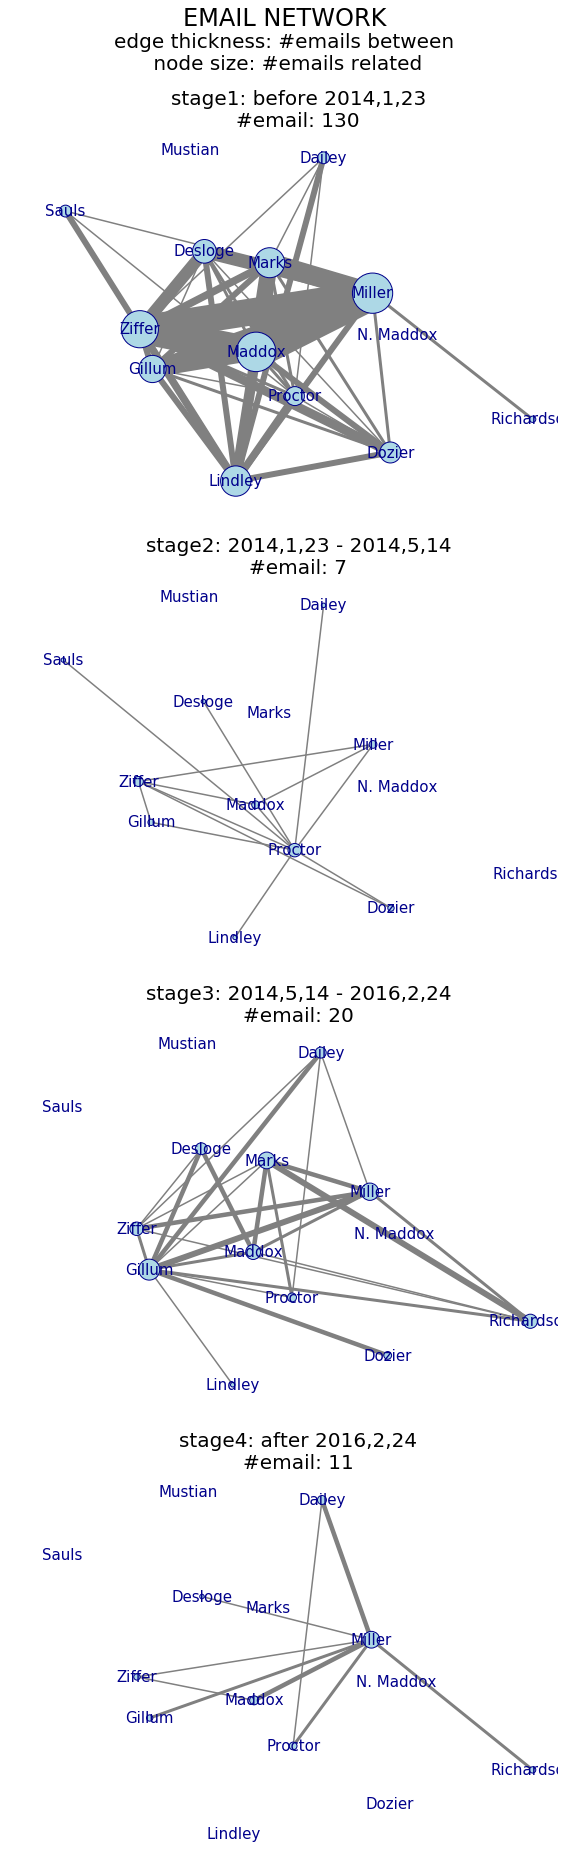

In [29]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('EMAIL NETWORK',fontsize = 24, y=1.04)
fig.text(.5, 1.005, 'edge thickness: #emails between\n node size: #emails related', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
#                             print('s',s)
#                             print(from_list[i].lower())
#                             print('t',t)
#                             print(to_list[i].lower())
#                             print(cc_list[i].lower())
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
            
    adj_mat = adj_email_mat1
    # clean all emails sent to the sender
    for i in range(14):
        adj_mat[i,i] = 0
    
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 1.5*np.array(edge_width)
    
    
#     df3 = df2.iloc[eval('idx'+str(i+1))] #####
    node_size = 20*adj_mat.sum(axis=0)
#     for name in names:
#         node_size.append(df3[name].sum()+1)
#     node_size = 10*np.array(node_size)
    
    nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='darkblue', node_color = 'lightblue')
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('Email_network1.png')
plt.show()

# Email network 2

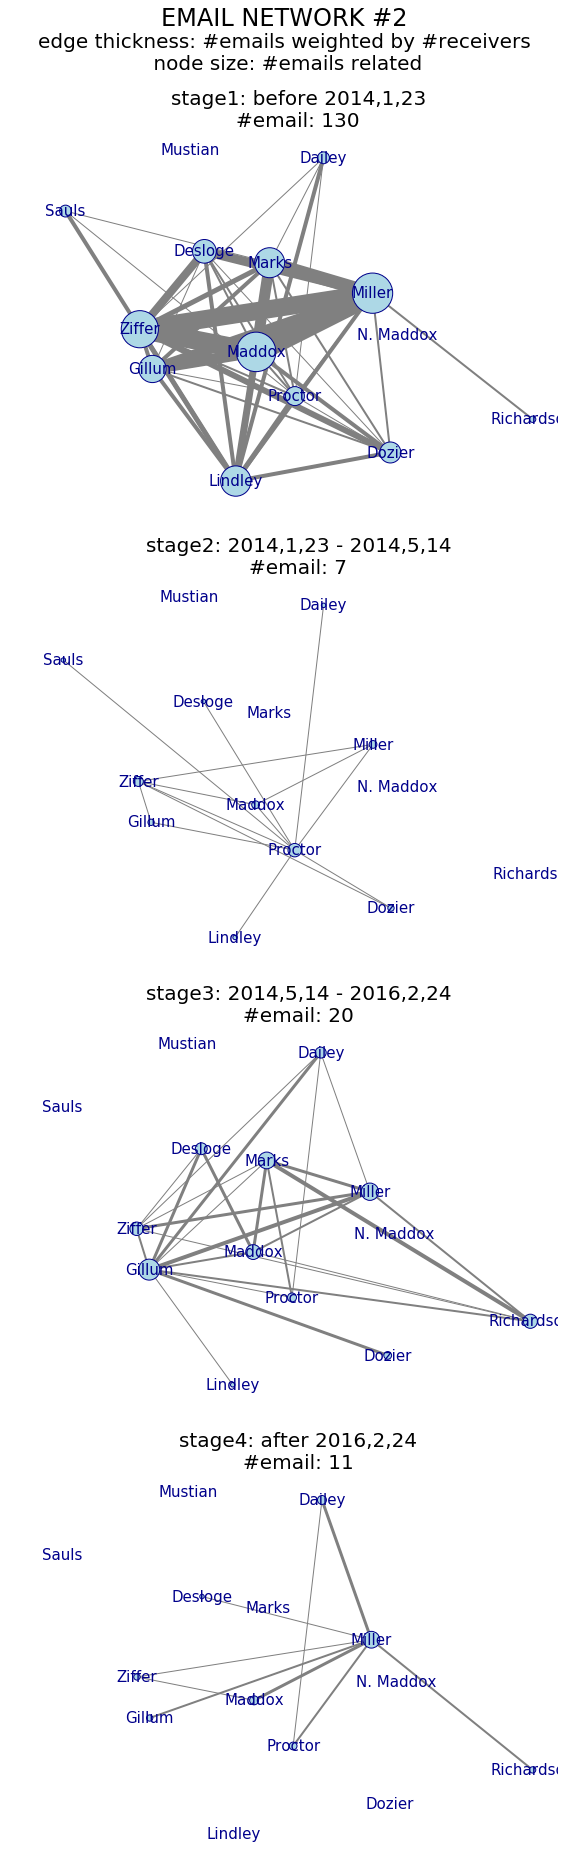

In [32]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('EMAIL NETWORK #2',fontsize = 24, y=1.04)
fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers\n node size: #emails related', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
#                             print('s',s)
#                             print(from_list[i].lower())
#                             print('t',t)
#                             print(to_list[i].lower())
#                             print(cc_list[i].lower())
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
            
    adj_mat = adj_email_mat2
    # clean all emails sent to the sender
    for i in range(14):
        adj_mat[i,i] = 0
        
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 2*np.array(edge_width)
    
    
#     df3 = df2.iloc[eval('idx'+str(i+1))] #####
    node_size = 40*adj_mat.sum(axis=0)
#     for name in names:
#         node_size.append(df3[name].sum()+1)
#     node_size = 10*np.array(node_size)
    
    nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='darkblue', node_color = 'lightblue')
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('Email_network2.png')
plt.show()

# Email network 3

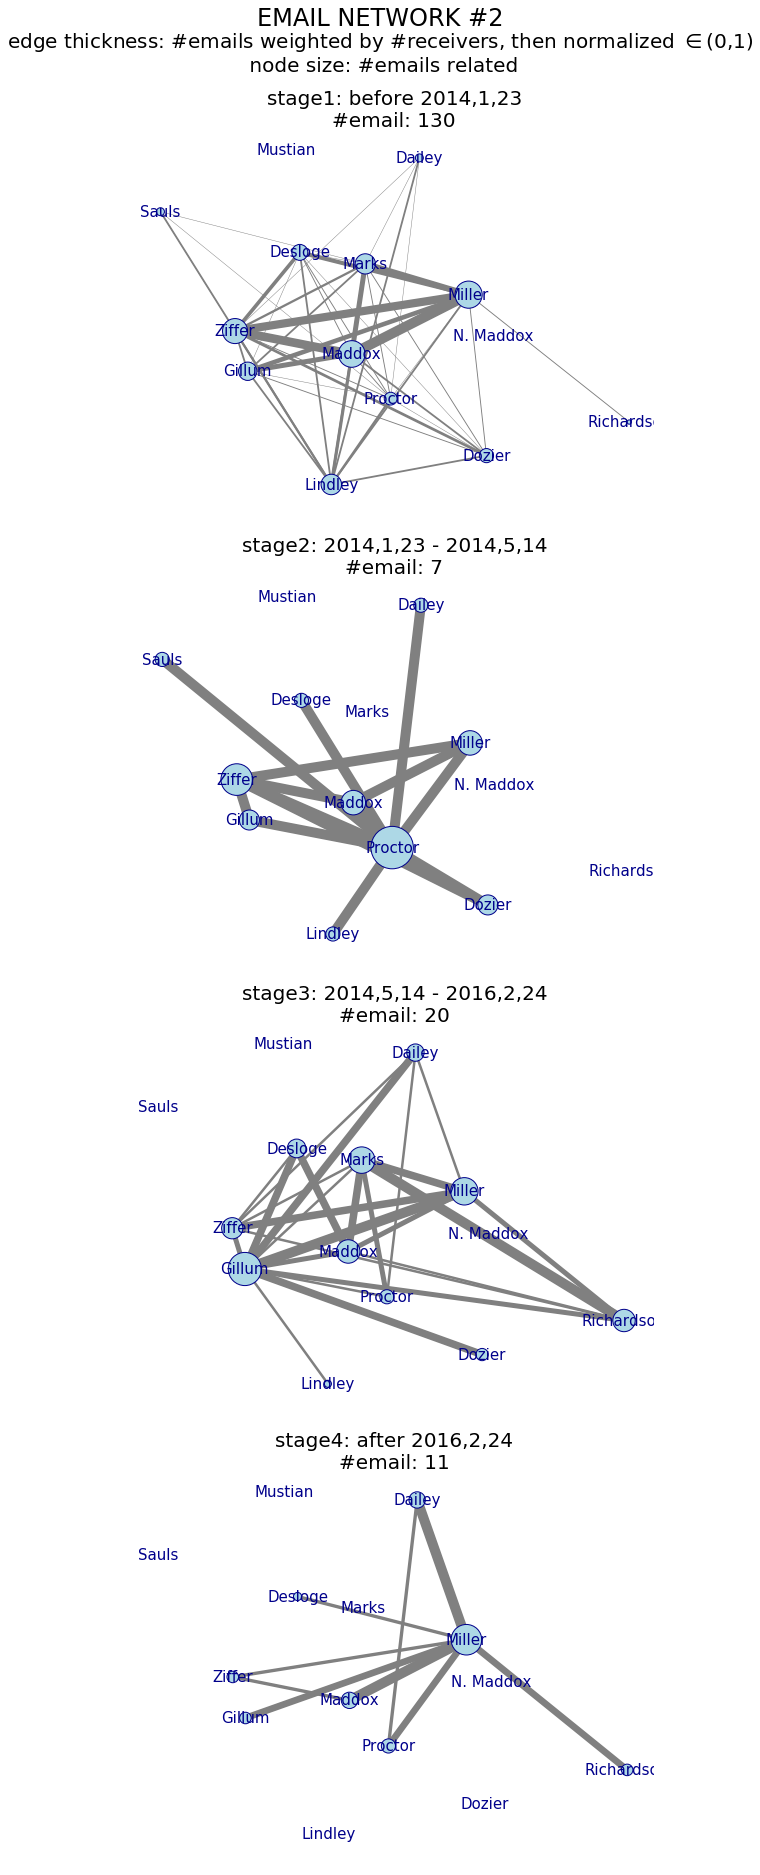

In [31]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('EMAIL NETWORK #2',fontsize = 24, y=1.04)
fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
#                             print('s',s)
#                             print(from_list[i].lower())
#                             print('t',t)
#                             print(to_list[i].lower())
#                             print(cc_list[i].lower())
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
    
    # clean all emails sent to the sender
    for i in range(14):
        adj_email_mat1[i,i] = 0
        adj_email_mat2[i,i] = 0
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    
    adj_mat = adj_email_mat2
        
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 10*np.array(edge_width)

    node_size = 200*adj_mat.sum(axis=0)
    
    nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='darkblue', node_color = 'lightblue')
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('Email_network3.png')
plt.show()

# Combined network

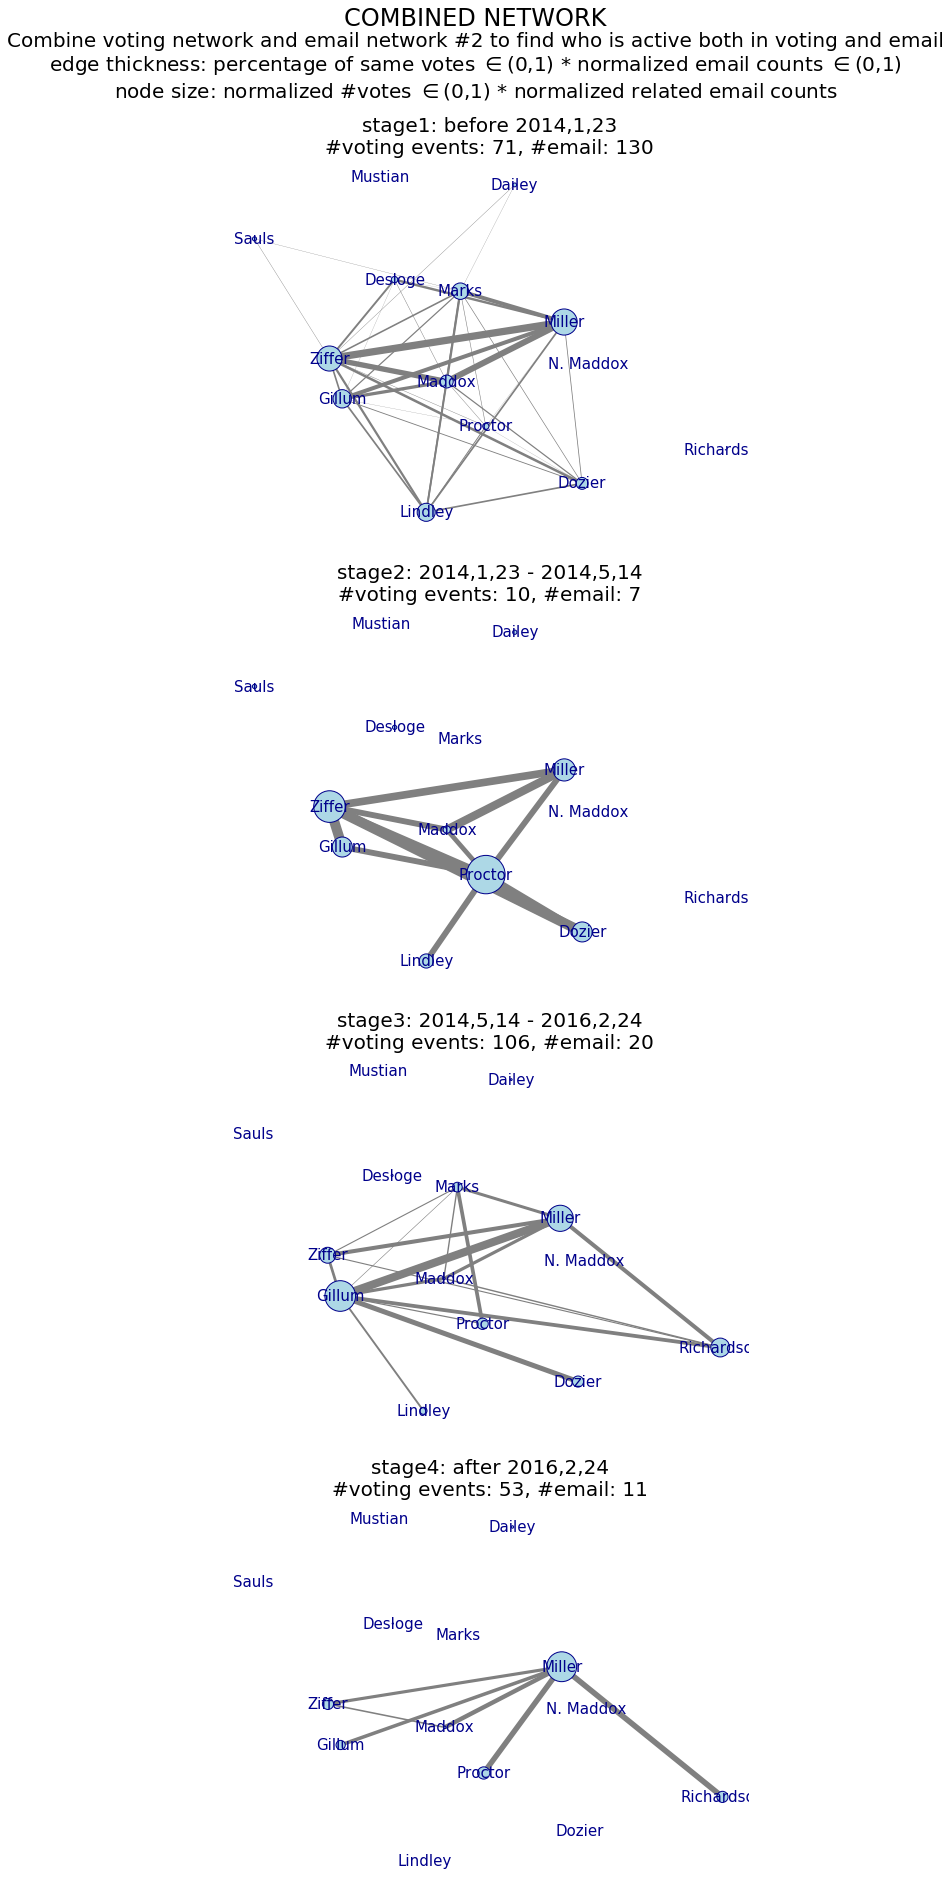

In [33]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('COMBINED NETWORK',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'Combine voting network and email network #2 to find who is active both in voting and email\nedge thickness: percentage of same votes $\in$(0,1) * normalized email counts $\in$(0,1)\nnode size: normalized #votes $\in$(0,1) * normalized related email counts', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    df_vote = pd.read_csv('CRA_MeetingMinutes_AdjacencyMatrix/Network_ActiveMember_AdjacencyMatrix_Phase_'+str(k+1)+'.csv',index_col=0)
    df_vote = df_vote.fillna(0)
    adj_mat_vote = df_vote.values
    
    G = nx.from_numpy_matrix(adj_mat)
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
#                             print('s',s)
#                             print(from_list[i].lower())
#                             print('t',t)
#                             print(to_list[i].lower())
#                             print(cc_list[i].lower())
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
    for i in range(14):
        adj_email_mat1[i,i] = 0
        adj_email_mat2[i,i] = 0
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    adj_mat_email = adj_email_mat2
    
    adj_mat = adj_mat_vote * adj_mat_email
    # clean all emails sent to the sender
    for i in range(14):
        adj_mat[i,i] = 0
        
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 10*np.array(edge_width)
    
    df3 = df2.iloc[idxvs[k]] #####
    node_size = []
    for name in names:
        node_size.append(df3[name].sum()+1)
    node_size = np.array(node_size)
    node_size = 200*node_size/node_size.max() * adj_mat_email.sum(axis=0)
    
    nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='darkblue', node_color = 'lightblue')
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n'+'#voting events: '+str(sum(idxvs[k]))+', #email: '+str(num_email),fontsize = 20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('combined_network.png')
plt.show()

# Voting network metrics visualization

## Degree centrality

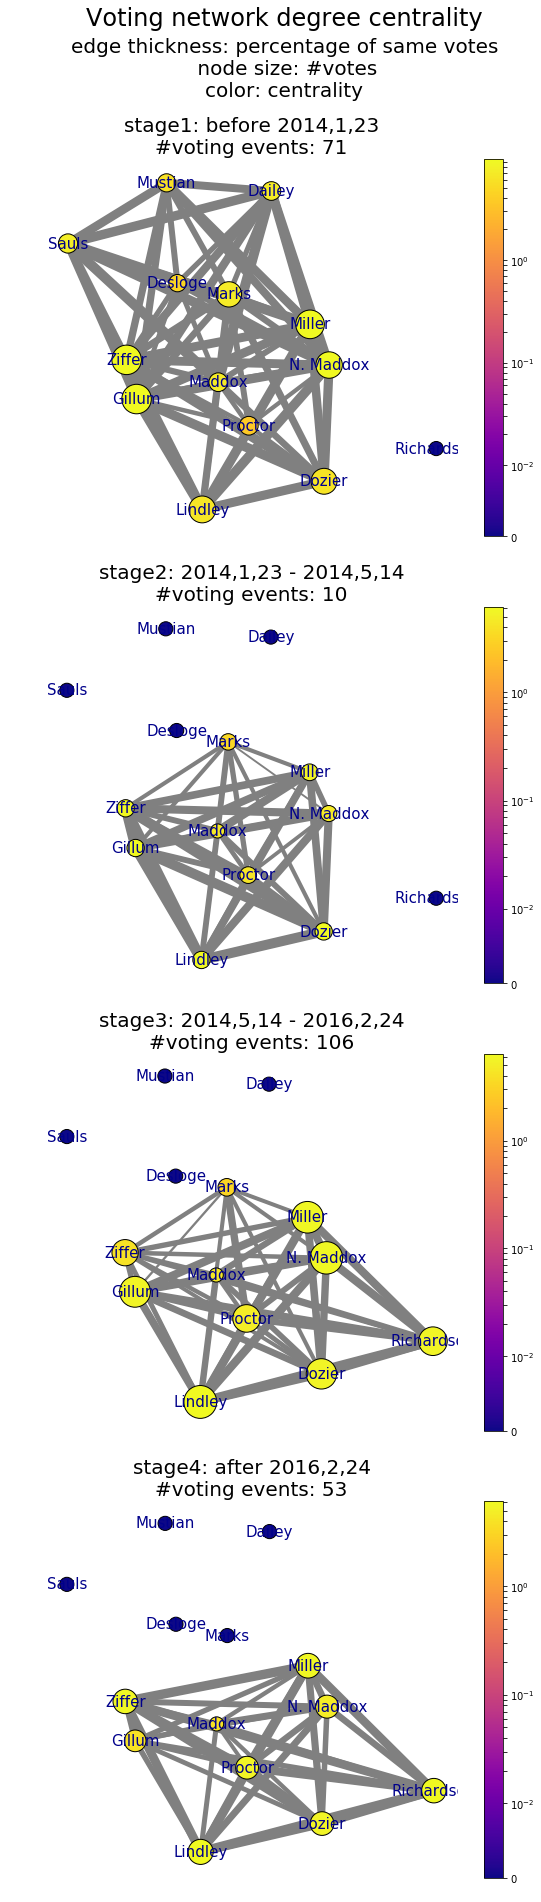

In [34]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('Voting network degree centrality',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'edge thickness: percentage of same votes\n node size: #votes\ncolor: centrality', fontsize = 20, ha='center')

for i in range(4):
    df_vote = pd.read_csv('CRA_MeetingMinutes_AdjacencyMatrix/Network_ActiveMember_AdjacencyMatrix_Phase_'+str(i+1)+'.csv',index_col=0)
    df_vote = df_vote.fillna(0)
    adj_mat = df_vote.values
    for j in range(14):
        adj_mat[j,j] = 0
    
    plt.subplot(4,1,i+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)
    if i == 0:
        pos = nx.kamada_kawai_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 10*np.array(edge_width)

    df3 = df2.iloc[idxvs[i]] 
    node_size = []
    for name in names:
        node_size.append(df3[name].sum()+20)
    node_size = 10*np.array(node_size)
    
    
    temp = adj_mat.sum(axis=0)
    measures = {}
    for j in range(temp.shape[0]):
        measures[j] = temp[j]
#     measures= nx.degree_centrality(G)
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='black' ,cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(i+1)+': '+stage_labels[i] + '\n#voting events: '+str(sum(idxvs[i])),fontsize = 20)
    plt.axis('off')
    plt.colorbar(nodes)
plt.tight_layout()
# plt.savefig('Voting_network.png')
plt.show()


## Closeness centrality

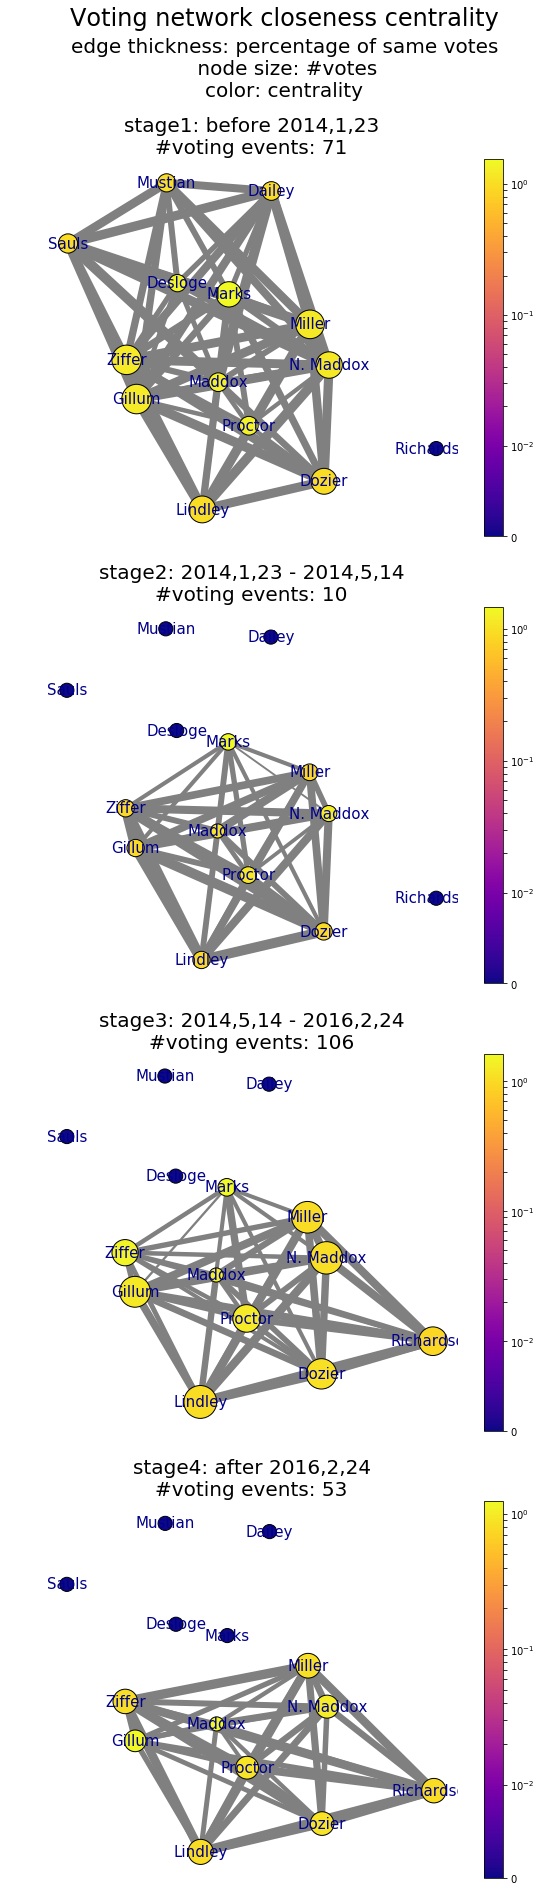

In [35]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('Voting network closeness centrality',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'edge thickness: percentage of same votes\n node size: #votes\ncolor: centrality', fontsize = 20, ha='center')

for i in range(4):
    df_vote = pd.read_csv('CRA_MeetingMinutes_AdjacencyMatrix/Network_ActiveMember_AdjacencyMatrix_Phase_'+str(i+1)+'.csv',index_col=0)
    df_vote = df_vote.fillna(0)
    adj_mat = df_vote.values
    for j in range(14):
        adj_mat[j,j] = 0
    
    plt.subplot(4,1,i+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)
    if i == 0:
        pos = nx.kamada_kawai_layout(G)

    edge_width = []
    edge_length = {}
    edges_list = G.edges()
    for s,t in edges_list:
        edge_length[(s,t)] = adj_mat[s,t]
        edge_width.append(adj_mat[s,t])
    nx.set_edge_attributes(G, edge_length, 'edge_length')
    edge_width = 10*np.array(edge_width)

    df3 = df2.iloc[idxvs[i]] 
    node_size = []
    for name in names:
        node_size.append(df3[name].sum()+20)
    node_size = 10*np.array(node_size)
    
    measures= nx.closeness_centrality(G,distance='edge_length')
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='black' ,cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(i+1)+': '+stage_labels[i] + '\n#voting events: '+str(sum(idxvs[i])),fontsize = 20)
    plt.axis('off')
    plt.colorbar(nodes)
plt.tight_layout()
# plt.savefig('Voting_network.png')
plt.show()


## Betweenness centrality

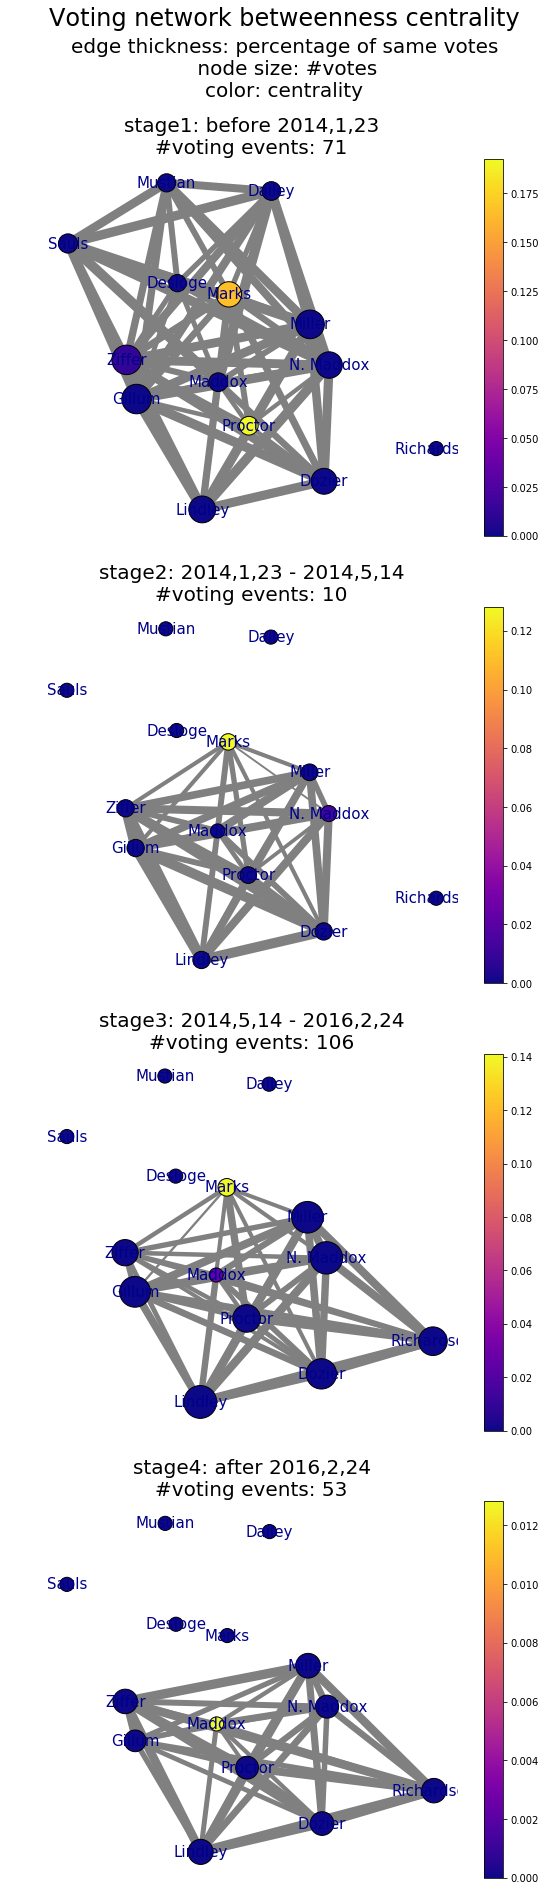

In [36]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('Voting network betweenness centrality',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'edge thickness: percentage of same votes\n node size: #votes\ncolor: centrality', fontsize = 20, ha='center')

for i in range(4):
    df_vote = pd.read_csv('CRA_MeetingMinutes_AdjacencyMatrix/Network_ActiveMember_AdjacencyMatrix_Phase_'+str(i+1)+'.csv',index_col=0)
    df_vote = df_vote.fillna(0)
    adj_mat = df_vote.values
    for j in range(14):
        adj_mat[j,j] = 0

    plt.subplot(4,1,i+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)
    if i == 0:
        pos = nx.kamada_kawai_layout(G)

    edge_width = []
    edge_length = {}
    edges_list = G.edges()
    for s,t in edges_list:
        edge_length[(s,t)] = adj_mat[s,t]
        edge_width.append(adj_mat[s,t])
    nx.set_edge_attributes(G, edge_length, 'edge_length')
    edge_width = 10*np.array(edge_width)
    
    df3 = df2.iloc[idxvs[i]] 
    node_size = []
    for name in names:
        node_size.append(df3[name].sum()+20)
    node_size = 10*np.array(node_size)
    
    measures= nx.betweenness_centrality(G, weight='edge_length')
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='black' ,cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())
#     nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(i+1)+': '+stage_labels[i] + '\n#voting events: '+str(sum(idxvs[i])),fontsize = 20)
    plt.axis('off')
    plt.colorbar(nodes)
plt.tight_layout()
# plt.savefig('Voting_network.png')
plt.show()


# Email network metric visualization

## Degree centrality

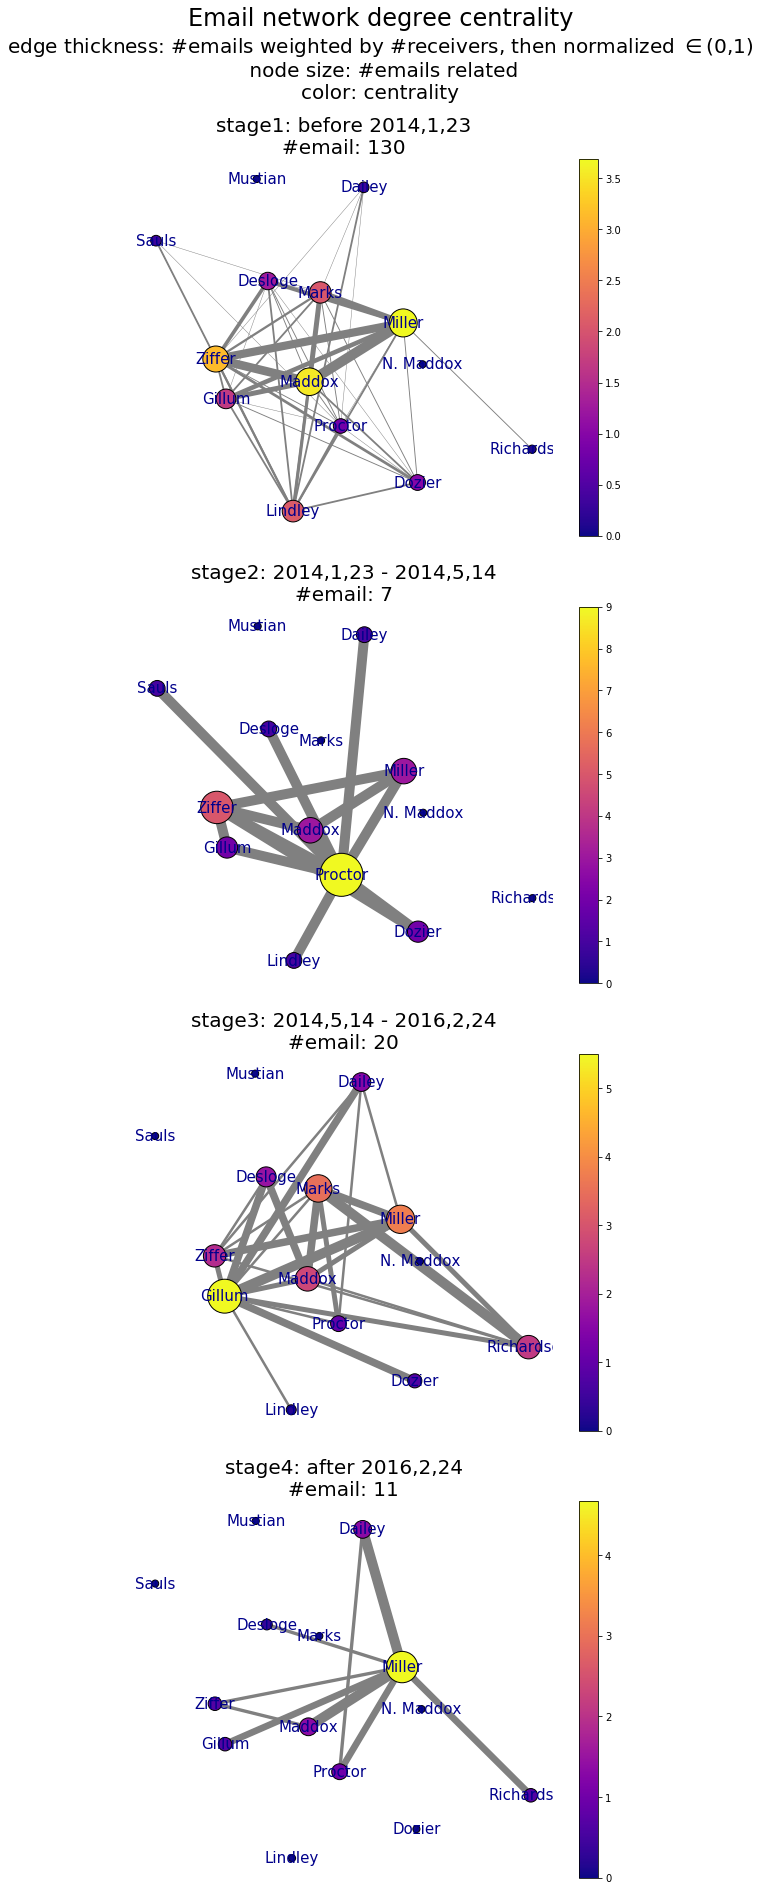

In [37]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('Email network degree centrality',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related\ncolor: centrality', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
    
    # clean all emails sent to the sender
    for i in range(14):
        adj_email_mat1[i,i] = 0
        adj_email_mat2[i,i] = 0
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    adj_mat = adj_email_mat2
    
    temp = adj_mat.sum(axis=0)
    measures = {}
    for j in range(temp.shape[0]):
        measures[j] = temp[j]
    
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[s,t])
    edge_width = 10*np.array(edge_width)

    node_size = 200*(adj_mat.sum(axis=0)) + 50
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='black' ,cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 20)
    plt.axis('off')
    plt.colorbar(nodes)
    
plt.tight_layout()
# plt.savefig('Email_network3.png')
plt.show()

## Closeness centrality

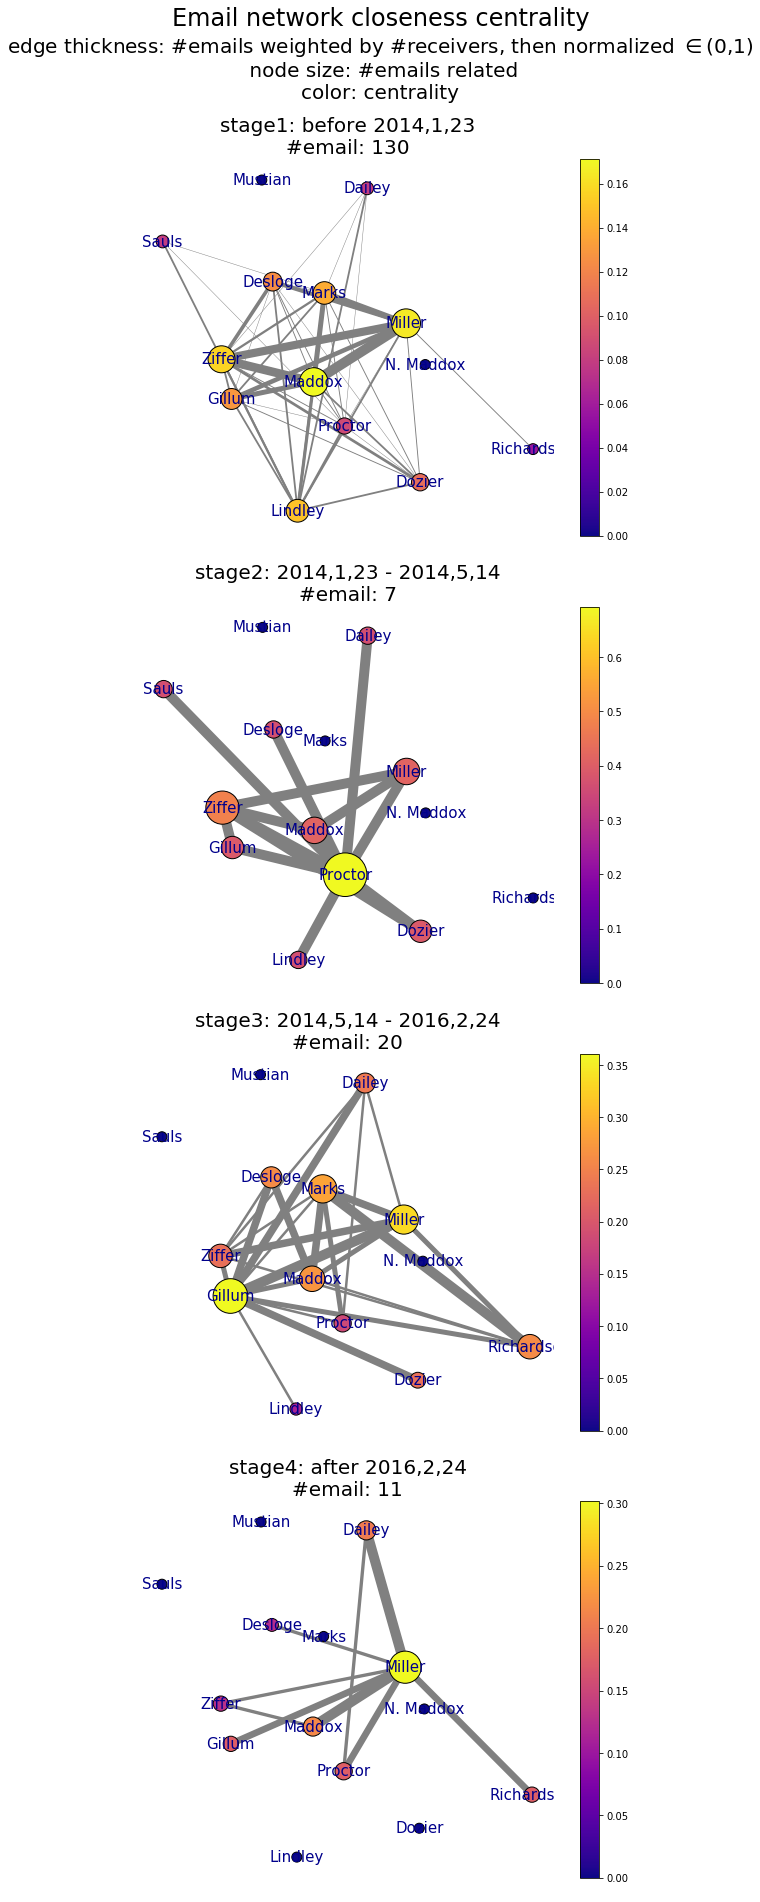

In [38]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('Email network closeness centrality',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related\ncolor: centrality', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
    
    # clean all emails sent to the sender
    for i in range(14):
        adj_email_mat1[i,i] = 0
        adj_email_mat2[i,i] = 0
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    adj_mat = adj_email_mat2
    
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)
    
    edge_width = []
    edge_length = {}
    edges_list = G.edges()
    for s,t in edges_list:
        edge_length[(s,t)] = 1/adj_mat[s,t]
        edge_width.append(adj_mat[s,t])

    nx.set_edge_attributes(G, edge_length, 'edge_length')
    edge_width = 10*np.array(edge_width)
    
    measures= nx.closeness_centrality(G,distance='edge_length')

    node_size = 200*(adj_mat.sum(axis=0)) + 100
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='black' ,cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 20)
    plt.axis('off')
    plt.colorbar(nodes)
    
plt.tight_layout()
# plt.savefig('Email_network3.png')
plt.show()

## Betweenness centrality

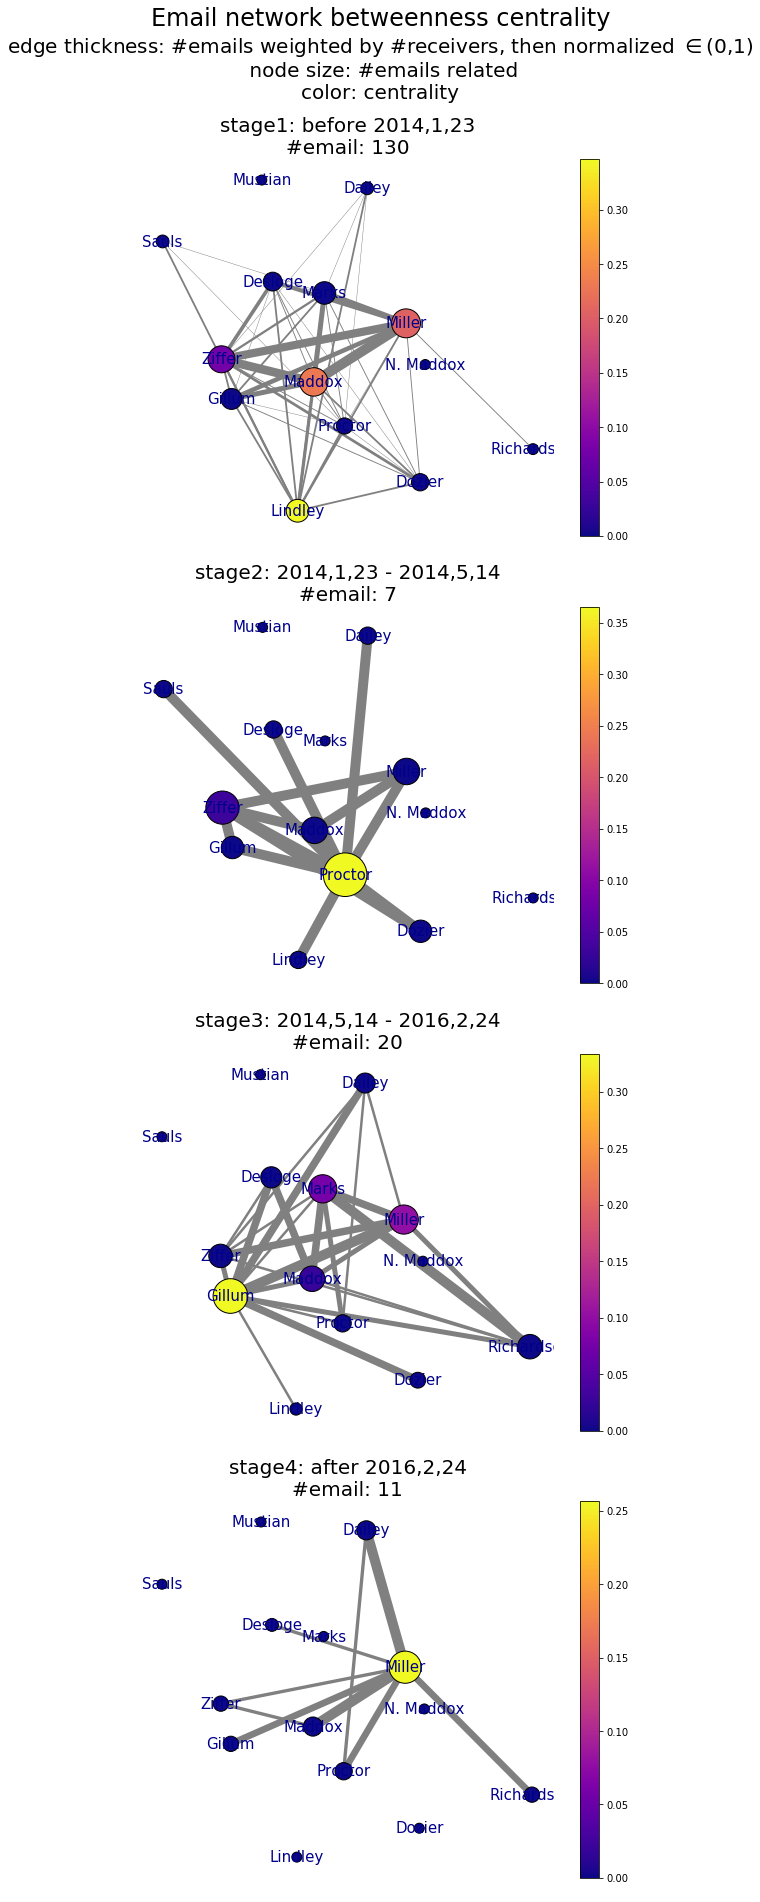

In [39]:
fig = plt.figure(figsize=(8,25))
fig.suptitle('Email network betweenness centrality',fontsize = 24, y=1.055)
fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related\ncolor: centrality', fontsize = 20, ha='center')
for k in range(4):
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
    adj_email_mat1 = np.zeros((14,14))
    adj_email_mat2 = np.zeros((14,14))
    
    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()
    
    for i in range(len(from_list)):
        for name in namelist:
            if name in from_list[i].lower():
                s = rev_labels[name]
                if s == 14:
                    s = 9
                for name in namelist:
                    if (name in to_list[i].lower() or name in cc_list[i].lower()):
                        t = rev_labels[name]
                        if t == 14:
                            t = 9
                        if s in [1,9,14] or t in [1,9,14]:
                            pass
                        adj_email_mat1[s,t] += 1
                        adj_email_mat2[s,t] += 1/num_TO_CC[i]
    
#     np.savetxt('email_adj_mat_phase'+str(k+1)+'.csv', adj_email_mat ,delimiter=",")
    for i in range(14):
        for j in range(i+1,14):
            adj_email_mat1[i,j] = adj_email_mat1[i,j] + adj_email_mat1[j,i]
            adj_email_mat1[j,i] = adj_email_mat1[i,j]
            adj_email_mat2[i,j] = adj_email_mat2[i,j] + adj_email_mat2[j,i]
            adj_email_mat2[j,i] = adj_email_mat2[i,j]
    
    # clean all emails sent to the sender
    for i in range(14):
        adj_email_mat1[i,i] = 0
        adj_email_mat2[i,i] = 0
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    adj_mat = adj_email_mat2
    
    plt.subplot(4,1,k+1)

    G = nx.from_numpy_matrix(adj_mat)
    # pos = nx.circular_layout(G)
    # pos = nx.random_layout(G)
    # pos = nx.spring_layout(G)
    
    edge_width = []
    edge_length = {}
    edges_list = G.edges()
    for s,t in edges_list:
        edge_length[(s,t)] = 1/adj_mat[s,t]
        edge_width.append(adj_mat[s,t])

    nx.set_edge_attributes(G, edge_length, 'edge_length')
    edge_width = 10*np.array(edge_width)
    
    measures= nx.betweenness_centrality(G, weight='edge_length')

    node_size = 200*(adj_mat.sum(axis=0)) + 100
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, edgecolors='black' ,cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())
    # nx.draw_networkx_edges(G, pos, edge_color = 'grey')
    nx.draw_networkx_edges(G, pos, width= edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=15, font_color='darkblue')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 20)
    plt.axis('off')
    plt.colorbar(nodes)
    
plt.tight_layout()
# plt.savefig('Email_network3.png')
plt.show()